## Matplotlib可视化手册

通过本手册，你将收获以下知识：
* matplotlib 及环境配置
* 数据图的组成结构，与 matplotlib 对应的名称
* 常见的数据绘图类型，与绘制方法

您可能需要以下的准备与先修知识：
* Python开发环境及matplotlib工具包
* Python基础语法
* Python numpy 包使用

### 1.matplotlib 安装配置

linux可以通过以下方式安装matplotlib
```
sudo pip install numpy
sudo pip install scipy
sudo pip install matplotlib
```

windows墙裂推荐大家使用anaconda

### 2.一幅可视化图的基本结构

通常，使用 numpy 组织数据, 使用 matplotlib API 进行数据图像绘制。 一幅数据图基本上包括如下结构：

* Data: 数据区，包括数据点、描绘形状
* Axis: 坐标轴，包括 X 轴、 Y 轴及其标签、刻度尺及其标签
* Title: 标题，数据图的描述
* Legend: 图例，区分图中包含的多种曲线或不同分类的数据
    
其他的还有图形文本 (Text)、注解 (Annotate)等其他描述

![](../img/Python_Figure_Structure.png)

### 3.画法

下面以常规图为例，详细记录作图流程及技巧。按照绘图结构，可将数据图的绘制分为如下几个步骤：

* 导入 matplotlib 包相关工具包
* 准备数据，numpy 数组存储
* 绘制原始曲线
* 配置标题、坐标轴、刻度、图例
* 添加文字说明、注解
* 显示、保存绘图结果

下面是一个包含cos、sin、sqrt函数的完整图像：
![](./img/img.png)

#### 3.1导包

会用到 matplotlib.pyplot、pylab 和 numpy

In [1]:
#coding:utf-8
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#### 3.2准备数据

numpy 常用来组织源数据:

In [2]:
# 定义数据部分
x = np.arange(0., 10, 0.2)
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.sqrt(x)

#x = all_df['house_age']
#y = all_df['house_price']

#### 3.3绘制基本曲线

使用 plot 函数直接绘制上述函数曲线，可以通过配置 plot 函数参数调整曲线的样式、粗细、颜色、标记等：

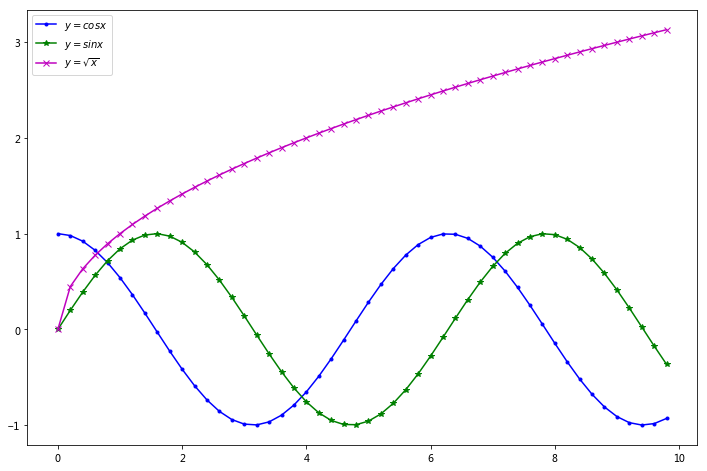

In [6]:
# 绘制 3 条函数曲线
# $y=\sqrt{x}$
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(x, y1, color='blue', linewidth=1.5, linestyle='-', marker='.', label=r'$y = cos{x}$')
plt.plot(x, y2, color='green', linewidth=1.5, linestyle='-', marker='*', label=r'$y = sin{x}$')
plt.plot(x, y3, color='m', linewidth=1.5, linestyle='-', marker='x', label=r'$y = \sqrt{x}$')
plt.legend()

#### 2.3.1 关于颜色的补充
[颜色网址](https://xkcd.com/color/rgb/)  
主要是color参数：
* r 红色
* g 绿色
* b 蓝色
* c cyan
* m 紫色
* y 土黄色
* k 黑色
* w 白色

![color.png](https://i.loli.net/2021/05/22/uAD3lr7ic5HBIXx.jpg)

#### 3.3.2 linestyle 参数

linestyle 参数主要包含虚线、点化虚线、粗虚线、实线，如下：

![line_style.png](https://i.loli.net/2021/05/22/sDRgLi5TFtJmx4j.png)

#### 3.3.3 marker 参数

marker参数设定在曲线上标记的特殊符号，以区分不同的线段。常见的形状及表示符号如下图所示：
![marks.png](https://i.loli.net/2021/05/22/sbLt3ivzcQjn4uC.png)

#### 3.4 设置坐标轴

可通过如下代码，移动坐标轴 spines  
[subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html?highlight=subplot#matplotlib.pyplot.subplot)

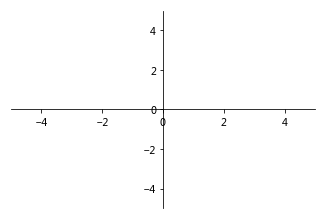

In [27]:
# 坐标轴
# ax = plt.subplot(111)
ax = plt.subplot(2,2,1) # 2行2列，左->右,上->下 第一个图
ax.spines['right'].set_color('none')     # 去掉右边的边框线,等价ax.spines['right'].set_visible(False)
ax.spines['top'].set_color('none')       # 去掉上边的边框线,等价ax.spines['top'].set_visible(False)

# 设置坐标轴
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

# x轴坐标刻度位置为bottom
ax.xaxis.set_ticks_position('bottom') 
# y轴坐标刻度位置为left
ax.yaxis.set_ticks_position('left')
# 设置底部恒轴0坐标移动到竖轴的0坐标位置
ax.spines['bottom'].set_position(('data', 0)) 
# 设置左侧竖轴0坐标移动到横轴0坐标位置
ax.spines['left'].set_position(('data', 0)) 

可通过如下代码，设置刻度尺间隔 lim、刻度标签 ticks

([<matplotlib.axis.YTick at 0x26f36cd3dd8>,
 <a list of 6 Text yticklabel objects>)

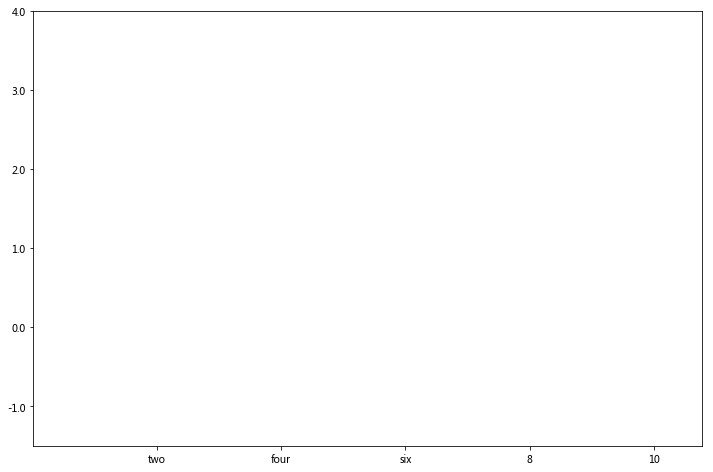

In [28]:
# 设置 x, y 轴的刻度取值范围
plt.xlim(x.min()*1.1, x.max()*1.1)
plt.ylim(-1.5, 4.0)
# 设置 x, y 轴的刻度标签值
plt.xticks([2, 4, 6, 8, 10], [r'two', r'four', r'six', r'8', r'10'])
plt.yticks([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0],
    [r'-1.0', r'0.0', r'1.0', r'2.0', r'3.0', r'4.0'])

可通过如下代码，设置 X、Y 坐标轴和标题：

Text(0, 0.5, '$y = f(x)$')

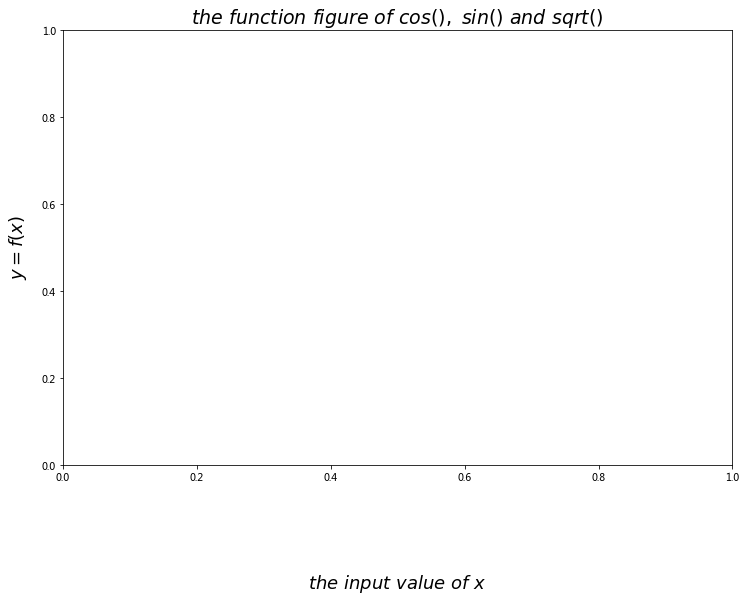

In [31]:
# 设置标题、x轴、y轴
plt.title(r'$the \ function \ figure \ of \ cos(), \ sin() \ and \ sqrt()$', fontsize=19)
plt.xlabel(r'$the \ input \ value \ of \ x$', fontsize=18, labelpad=88.8)
plt.ylabel(r'$y = f(x)$', fontsize=18, labelpad=12.5)

#### 3.5 设置文字描述、注解

可通过如下代码，在数据图中添加文字
描述 text：

Text(0.8, 0.8, '$y \\in [-1.0, \\ 4.0]$')

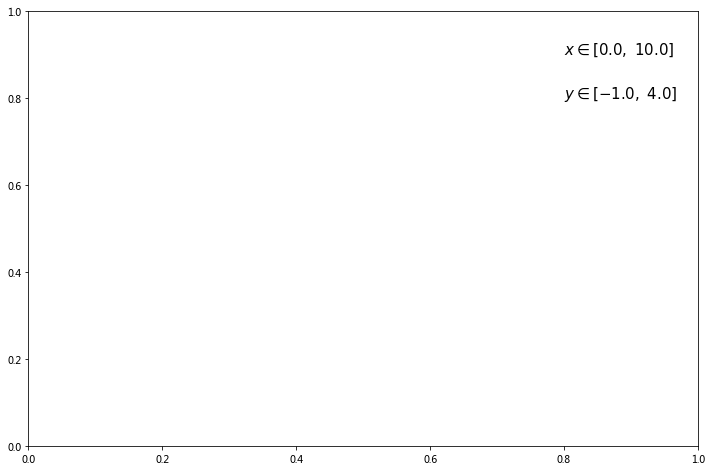

In [32]:
plt.text(0.8, 0.9, r'$x \in [0.0, \ 10.0]$', color='k', fontsize=15)
plt.text(0.8, 0.8, r'$y \in [-1.0, \ 4.0]$', color='k', fontsize=15)

可通过如下代码，在数据图中给特殊点添加注解 annotate：

Text(8.002, 2.83, '$2\\sqrt{2}$')

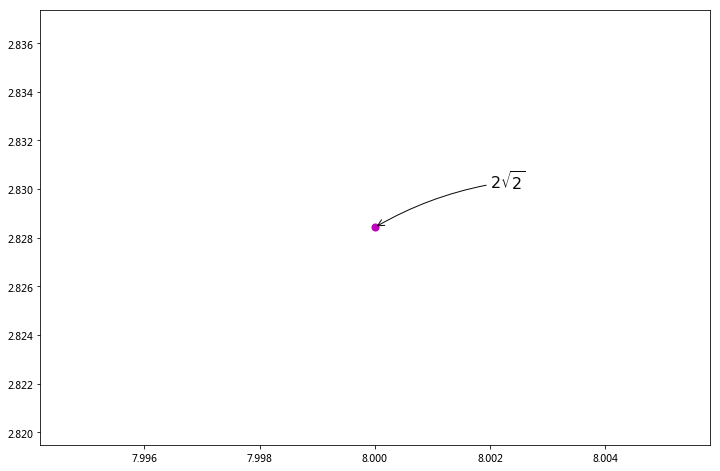

In [33]:
# 特殊点添加注解,annotate就是箭头
plt.scatter([8,],[np.sqrt(8),], 50, color ='m')  # 使用散点图放大当前点
plt.annotate(r'$2\sqrt{2}$', xy=(8, np.sqrt(8)), xytext=(8.002, 2.83), fontsize=16, color='#090909', arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0.1', color='#090909'))

#### 3.6 设置图例

可使用如下两种方式，给绘图设置图例：
* 1: 在 plt.plot 函数中添加 label 参数后，使用 plt.legend(loc=’up right’)
* 2: 不使用参数 label, 直接使用如下命令：

plt.legend(['cos(x)', 'sin(x)', 'sqrt(x)'], loc='upper right')

![legend.png](https://i.loli.net/2021/05/22/CLMrdpUYsDx2Z8a.png)

#### 3.7 网格线开关

可使用如下代码，给绘图设置网格线：

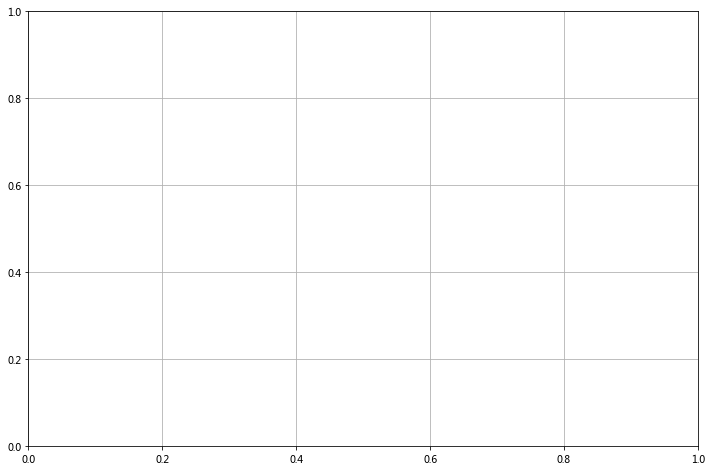

In [34]:
# 显示网格线
plt.grid(True)

#### 3.8 显示与图像保存

In [35]:
plt.show()    # 显示
#savefig('./figures/plot3d_ex.png',dpi=48)    # 保存，前提目录存在

### 4.完整的绘制程序

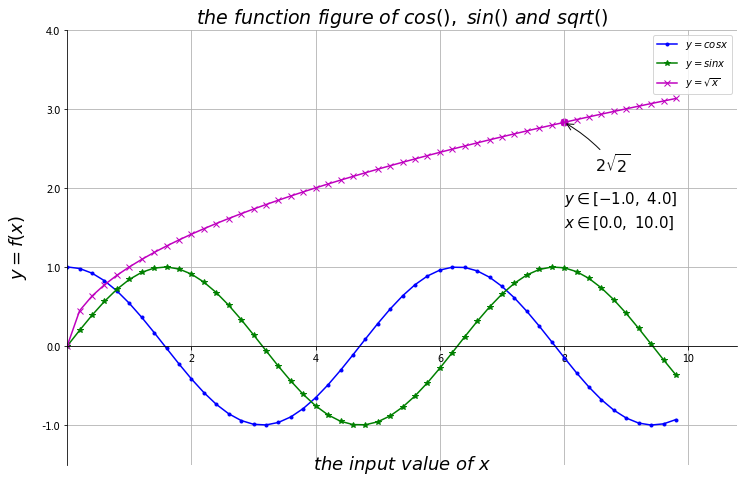

In [36]:
#coding:utf-8
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

# 定义数据部分
x = np.arange(0., 10, 0.2)
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.sqrt(x)

# 绘制 3 条函数曲线
plt.plot(x, y1, color='blue', linewidth=1.5, linestyle='-', marker='.', label=r'$y = cos{x}$')
plt.plot(x, y2, color='green', linewidth=1.5, linestyle='-', marker='*', label=r'$y = sin{x}$')
plt.plot(x, y3, color='m', linewidth=1.5, linestyle='-', marker='x', label=r'$y = \sqrt{x}$')

# 坐标轴上移
ax = plt.subplot(111)
ax.spines['right'].set_color('none')     # 去掉右边的边框线
ax.spines['top'].set_color('none')       # 去掉上边的边框线

# 移动下边边框线，相当于移动 X 轴
ax.xaxis.set_ticks_position('bottom')    
ax.spines['bottom'].set_position(('data', 0))

# 移动左边边框线，相当于移动 y 轴
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

# 设置 x, y 轴的取值范围
plt.xlim(x.min()*1.1, x.max()*1.1)
plt.ylim(-1.5, 4.0)

# 设置 x, y 轴的刻度值
plt.xticks([2, 4, 6, 8, 10], [r'2', r'4', r'6', r'8', r'10'])
plt.yticks([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], 
    [r'-1.0', r'0.0', r'1.0', r'2.0', r'3.0', r'4.0'])

# 添加文字
plt.text(8, 1.5, r'$x \in [0.0, \ 10.0]$', color='k', fontsize=15)
plt.text(8, 1.8, r'$y \in [-1.0, \ 4.0]$', color='k', fontsize=15)

# 特殊点添加注解
plt.scatter([8,],[np.sqrt(8),], 50, color ='m')  # 使用散点图放大当前点
plt.annotate(r'$2\sqrt{2}$', xy=(8, np.sqrt(8)), xytext=(8.5, 2.2), fontsize=16, color='#090909', arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0.1', color='#090909'))

# 设置标题、x轴、y轴
plt.title(r'$the \ function \ figure \ of \ cos(), \ sin() \ and \ sqrt()$', fontsize=19)
plt.xlabel(r'$the \ input \ value \ of \ x$', fontsize=18, labelpad=88.8)
plt.ylabel(r'$y = f(x)$', fontsize=18, labelpad=12.5)

# 设置图例及位置
plt.legend(loc='best')    
# plt.legend(['cos(x)', 'sin(x)', 'sqrt(x)'], loc='up right')


# 显示网格线
plt.grid(True)    

# 显示绘图
plt.show()

## 常用图形
**细节看[这里](http://matplotlib.org/api/pyplot_api.html)，看[这里](http://matplotlib.org/api/pyplot_api.html)，看[这里](http://matplotlib.org/api/pyplot_api.html)**

* 曲线图：matplotlib.pyplot.plot(data)
* 灰度/直方图：matplotlib.pyplot.hist(data)
* 散点图：matplotlib.pyplot.scatter(data)
* 箱式/箱线图：matplotlib.pyplot.boxplot(data)

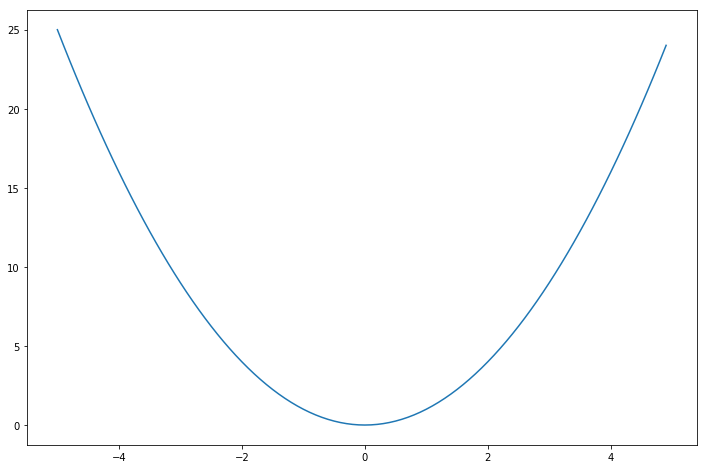

In [14]:
x = np.arange(-5,5,0.1)
y = x ** 2
plt.plot(x,y)

(array([  4.,  11.,  49., 105., 174., 250., 206., 137.,  49.,  15.]),
 array([-3.31036073, -2.7161155 , -2.12187028, -1.52762505, -0.93337983,
        -0.3391346 ,  0.25511062,  0.84935585,  1.44360107,  2.0378463 ,
         2.63209152]),
 <a list of 10 Patch objects>)

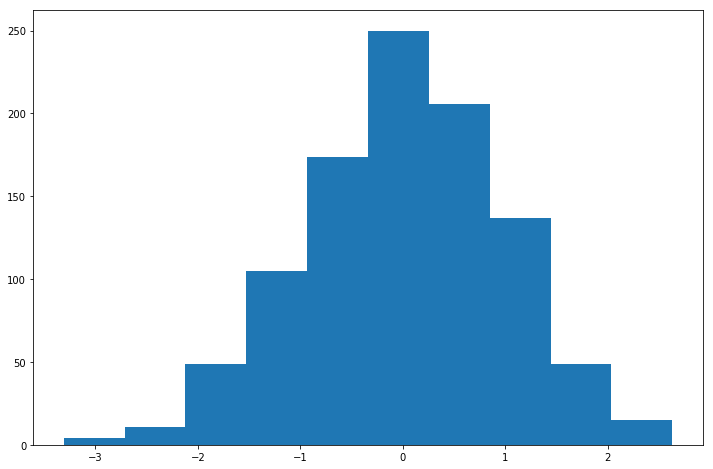

In [15]:
x = np.random.normal(size=1000)
plt.hist(x, bins=10)

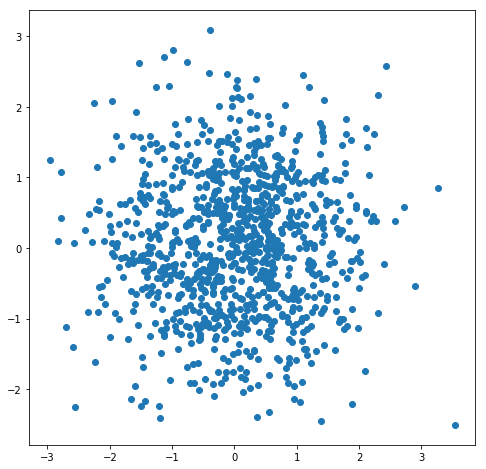

In [16]:
plt.rcParams["figure.figsize"] = (8,8)
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)
plt.scatter(x,y)

{'boxes': [<matplotlib.lines.Line2D at 0x11a704400>],
 'caps': [<matplotlib.lines.Line2D at 0x11a704e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a70dac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11a70d6a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11a704550>,
  <matplotlib.lines.Line2D at 0x11a7049e8>]}

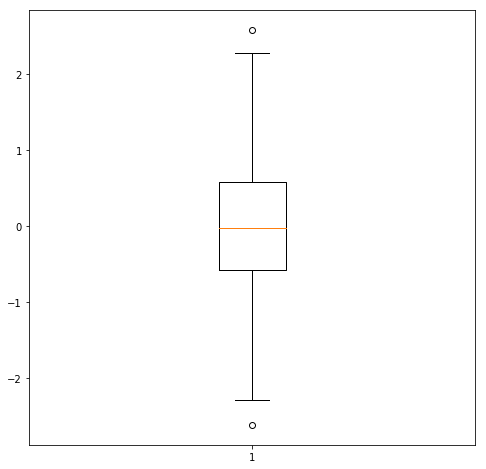

In [3]:
plt.rcParams["figure.figsize"] = (8,8)
x = np.random.normal(size=100)
plt.boxplot(x)

**箱式图(boxplot)科普**

* 上边缘（Q3+1.5\*IQR/“箱子高度”）、下边缘（Q1-1.5\*IQR/“箱子高度”）、IQR=Q3-Q1
* 上四分位数（Q3）、下四分位数（Q1）
* 中位数
* 异常值
* 处理异常值时与3$\sigma$标准的异同：统计边界是否受异常值影响、容忍度的大小

**matplotlib的工具手册在[这里](http://matplotlib.org/api/pyplot_api.html)可以查到**